In [18]:
# Constants

RAW_DATA_FILES_PATH = "data"
OUTPUT_LABEL = "PM2.5 (µg/m³)"

# TODO:
# convert data from hourly to daily
# does hourly and daily data has some difference in pattern?
# convert every file to daily from hourly or build new files from base station daily files?
# does imputation help in data normalization?

# NOTE:
# use imputation to impute as less null values as possible
# use aggregated data files for insights on comapring year or region pollution

In [115]:
import os, re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.axes as pltaxes
import matplotlib.pyplot as plt
import regex

In [38]:
dfs = {}

In [39]:
for filename in os.listdir(RAW_DATA_FILES_PATH):
    if re.match(regex.YEAR_FILE_PATTERN, filename):
        filename = os.path.splitext(filename)[0]
        dfs[filename] = pd.read_csv(os.path.join(RAW_DATA_FILES_PATH, filename))

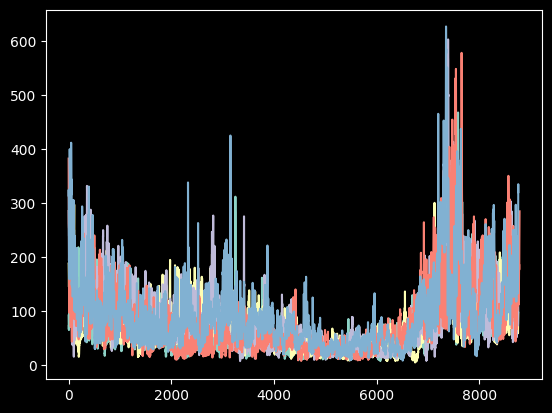

In [13]:
for dataset in dfs:
    dataset['PM2.5 (µg/m³)'].plot()

In [51]:
def plot_monthly_average(
    ax: pltaxes.Axes,
    df: pd.DataFrame,
    column_name: str = "PM2.5 (µg/m³)",
    xlabel: str = "Month",
    ylabel: str = "PM2.5",
    title: str = "Month VS PM2.5",
    grid: bool = False,
):
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    df["Month"] = df["Timestamp"].dt.strftime("%B")
    monthly_averages = df.groupby("Month")[column_name].mean()
    monthly_averages = monthly_averages.reindex(
        [
            "January",
            "February",
            "March",
            "April",
            "May",
            "June",
            "July",
            "August",
            "September",
            "October",
            "November",
            "December",
        ]
    )

    ax.plot(monthly_averages.index, monthly_averages.values)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.tick_params(axis="x", rotation=45)
    if grid:
        ax.grid()

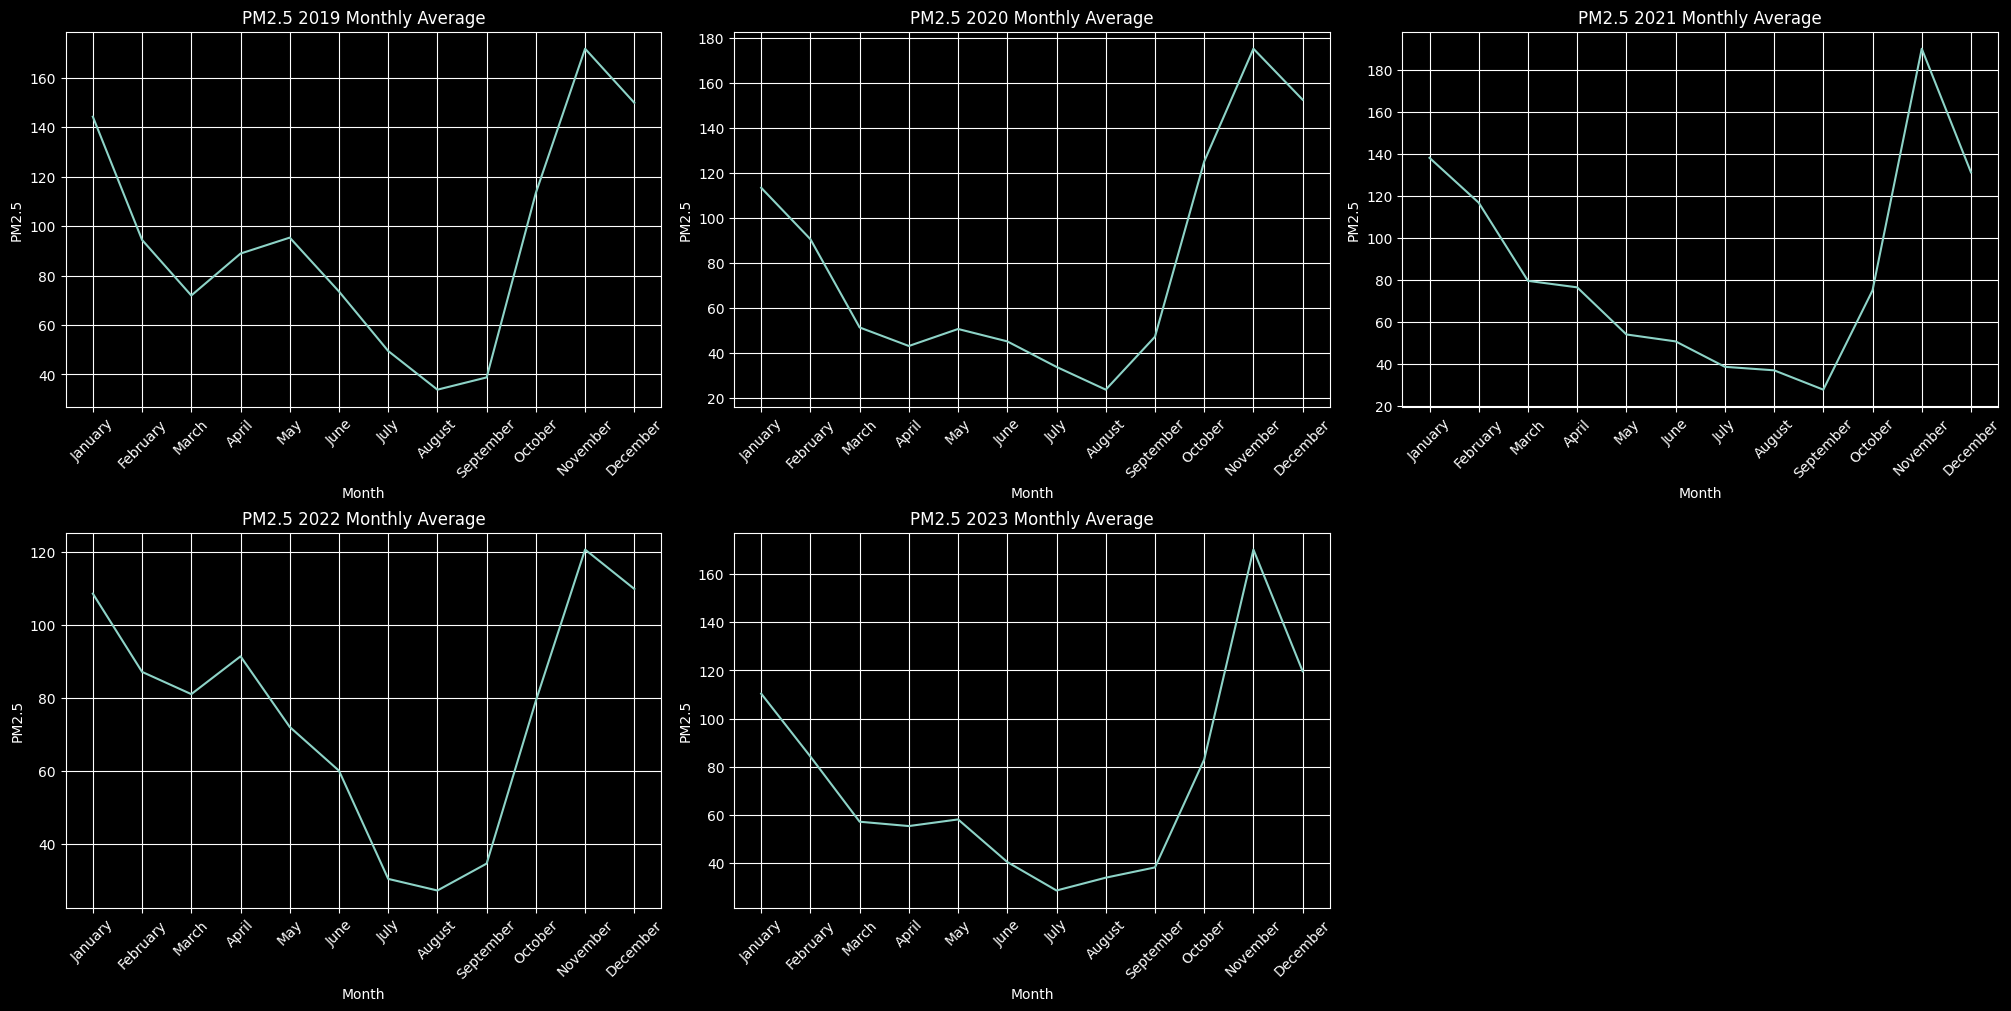

In [ ]:
# create subplots
years = sorted(dfs.keys())
num_years = len(years)
cols = 3
rows = (num_years + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5), constrained_layout=True)

axes = axes.flatten()

# Plot for each year
for i, year in enumerate(years):
    plot_monthly_average(
        axes[i],
        dfs[year],
        column_name="PM2.5 (µg/m³)",
        xlabel="Month",
        ylabel="PM2.5",
        title=f"PM2.5 {year} Monthly Average",
        grid=True,
    )

# Hide unused plots
for i in range(num_years, len(axes)):
    axes[i].axis("off")

plt.show()

In [65]:
series = dfs["2019"]["PM2.5 (µg/m³)"]

<Axes: >

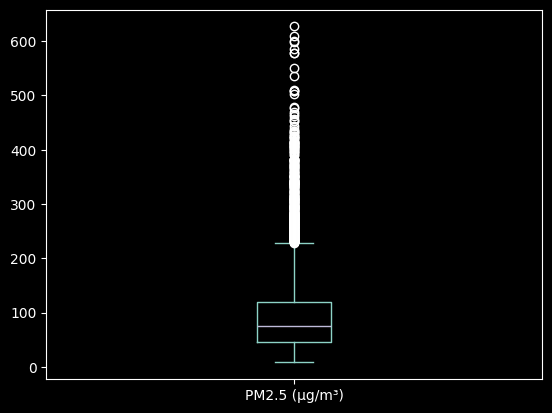

In [66]:
series.plot(kind='box')

<Axes: >

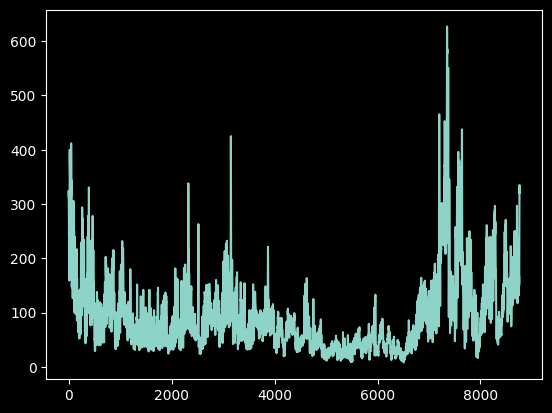

In [67]:
series.plot(kind='line')

<Axes: >

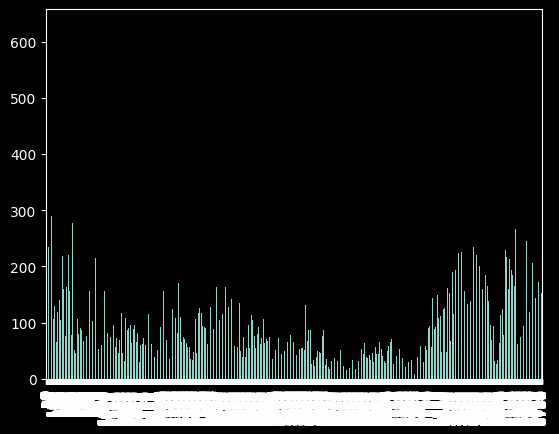

In [68]:
series.plot(kind='bar')

<Axes: ylabel='Frequency'>

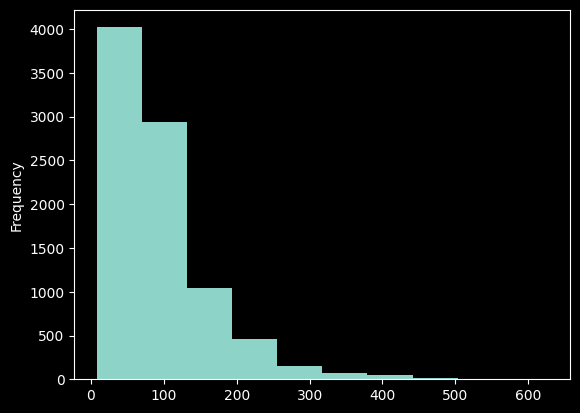

In [69]:
series.plot(kind='hist')

<Axes: >

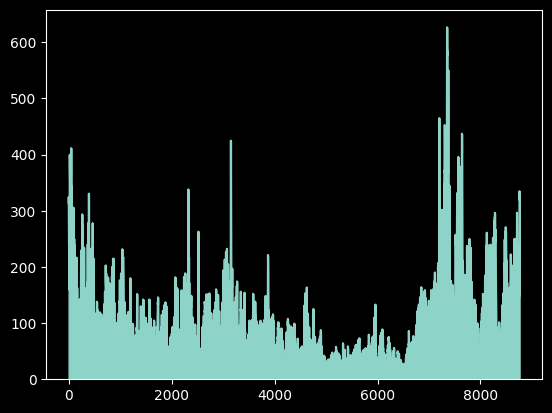

In [70]:
series.plot(kind='area')

<Axes: xlabel='Month', ylabel='PM2.5 (µg/m³)'>

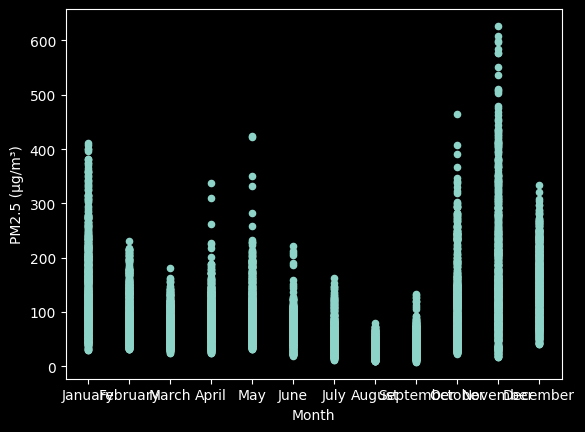

In [73]:
dfs["2019"].plot(kind="scatter", x="Month", y="PM2.5 (µg/m³)")

<Axes: ylabel='PM2.5 (µg/m³)'>

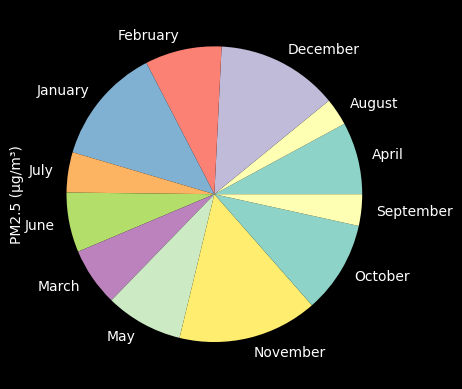

In [74]:
dfs["2019"].groupby("Month")["PM2.5 (µg/m³)"].mean().plot(kind="pie")

In [132]:
# plot pm2.5 of different regions over same year
dataset = pd.read_csv(os.path.join(RAW_DATA_FILES_PATH, "2019_all_regions.csv"))

In [133]:
df = dataset[dataset["Region"] != "Faridabad"]

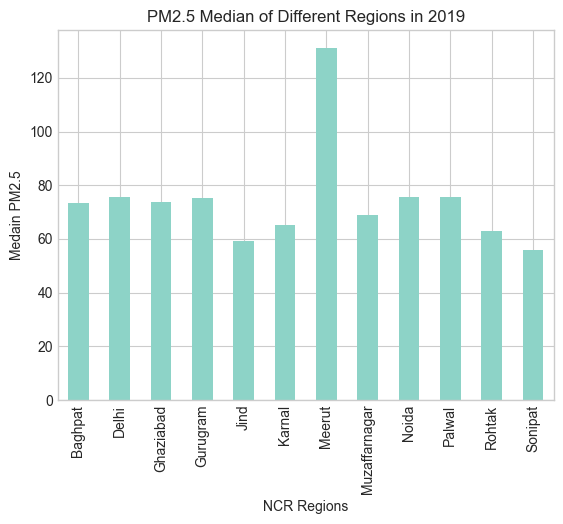

In [134]:
df.groupby("Region")["PM2.5 (µg/m³)"].median().plot(kind="bar")
plt.xlabel("NCR Regions")
plt.ylabel("Medain PM2.5")
plt.title("PM2.5 Median of Different Regions in 2019")
plt.show()

In [135]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [136]:
plt.style.use("seaborn-v0_8-whitegrid")

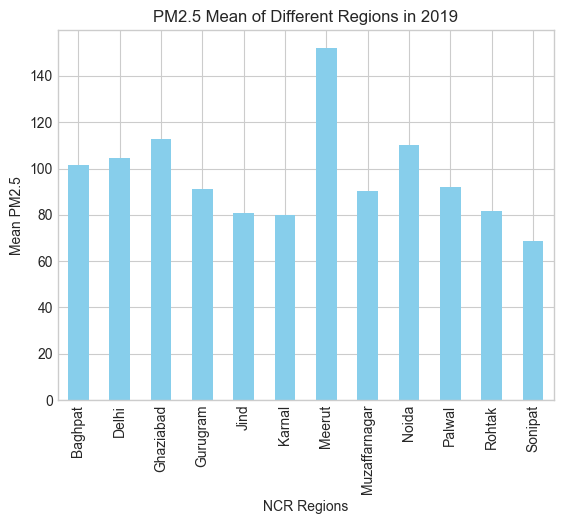

In [138]:
df.groupby("Region")["PM2.5 (µg/m³)"].mean().plot(kind="bar",color="skyblue")
plt.xlabel("NCR Regions")
plt.ylabel("Mean PM2.5")
plt.title("PM2.5 Mean of Different Regions in 2019")
plt.show()

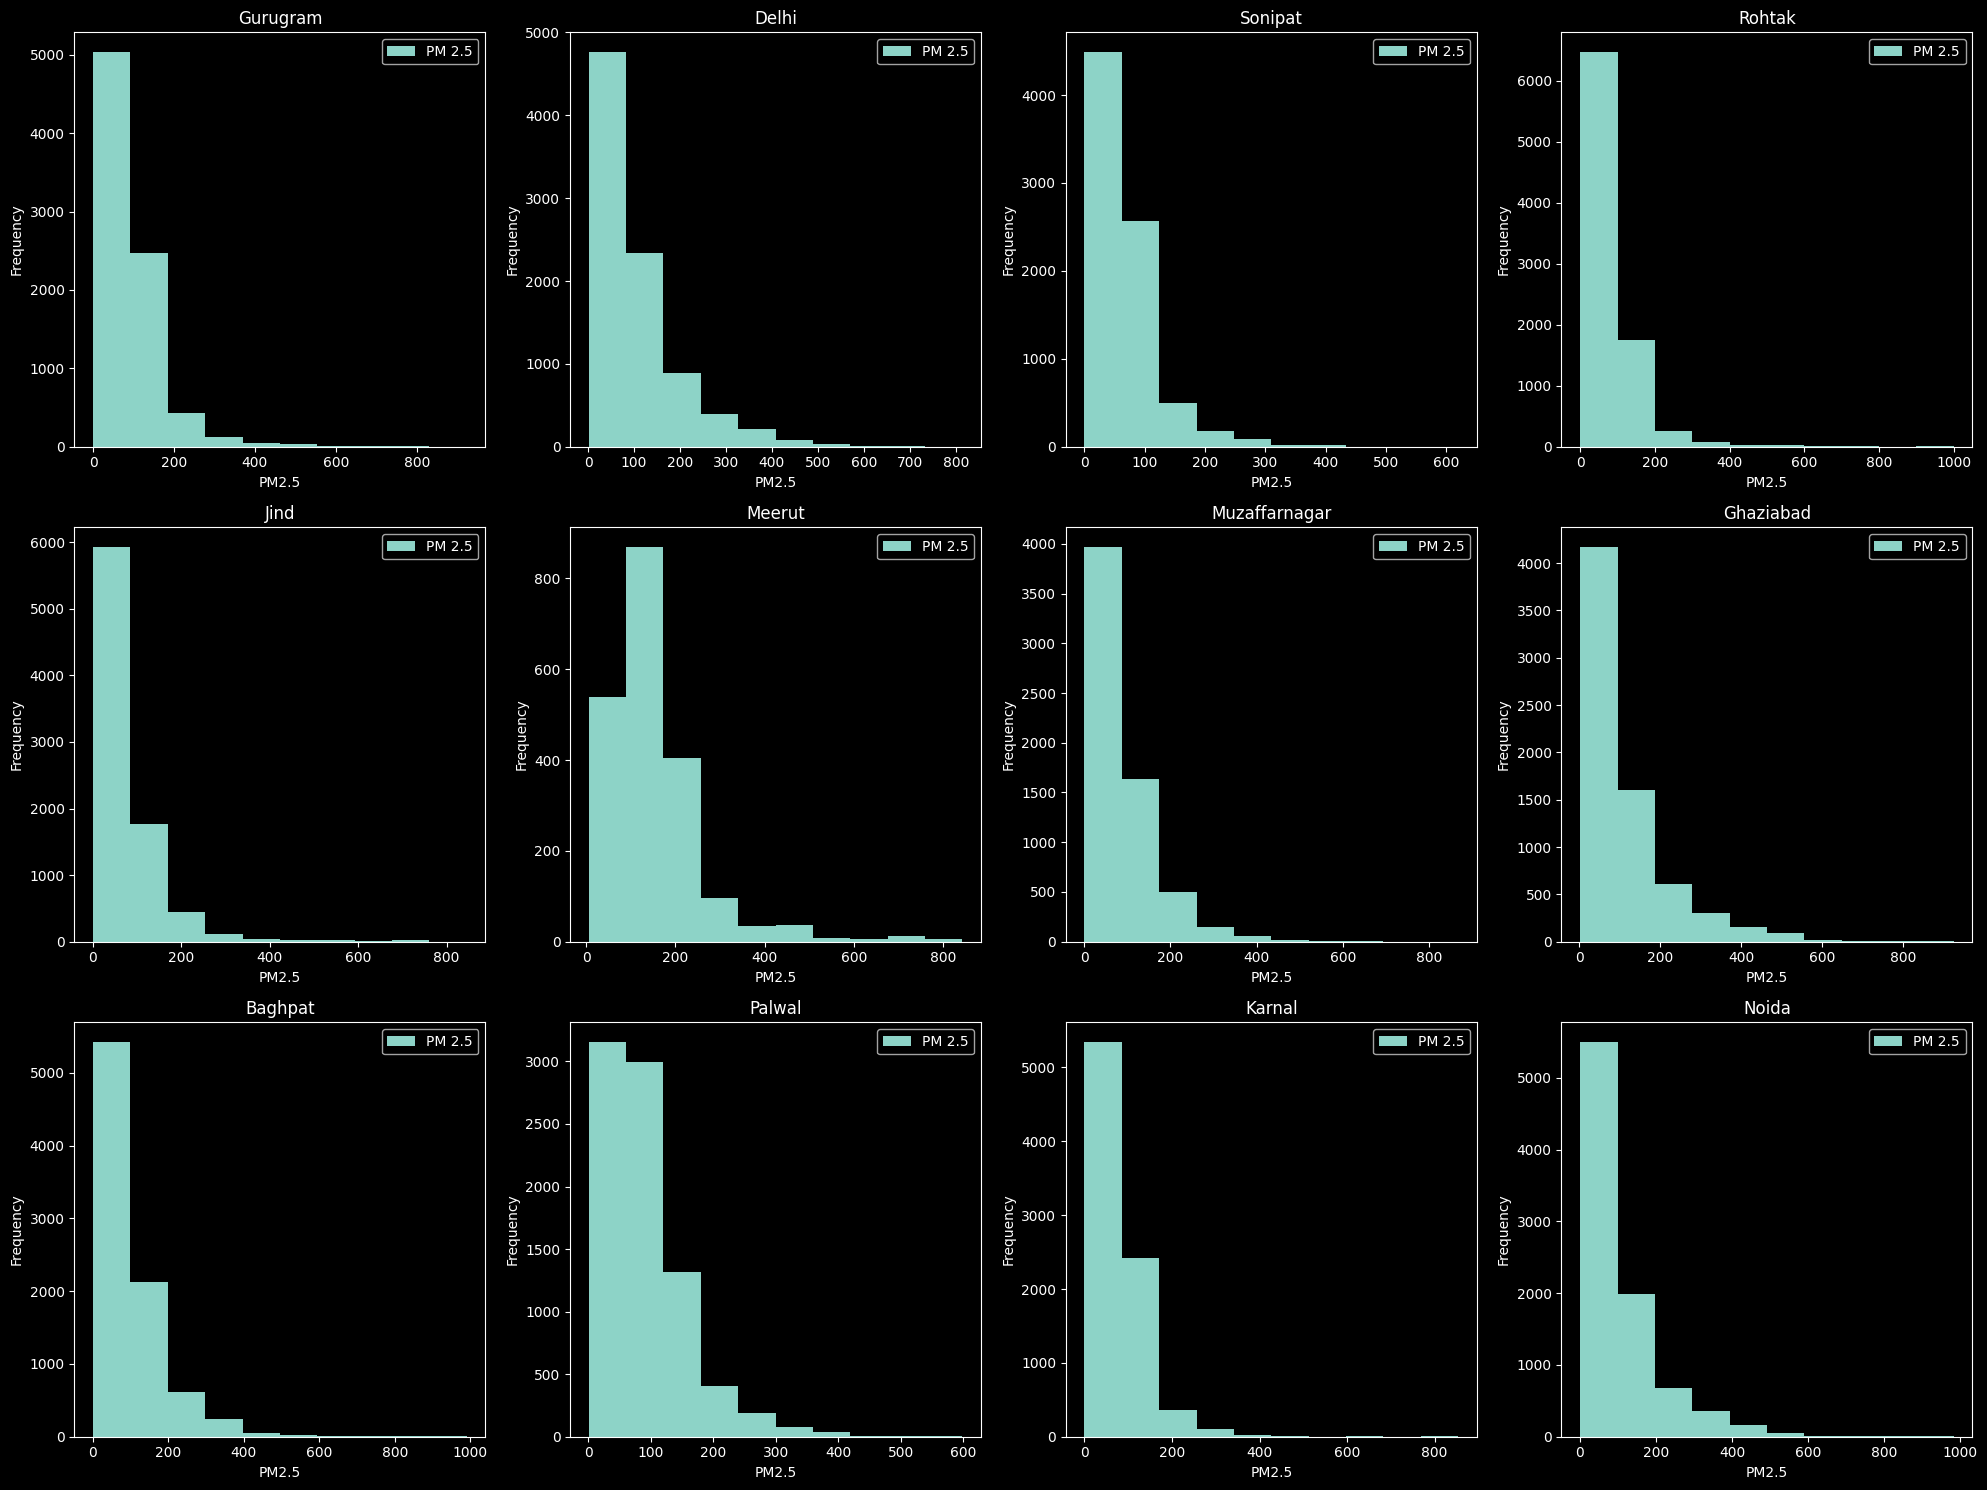

In [17]:
# plot distribution of PM2.5 for each NCR region
regions = df["Region"].unique()
n_regions = len(regions)

col = 4
row = (n_regions + col - 1) // col

fig, axes = plt.subplots(row, col, figsize=(20, row * 5))
axes = axes.flatten()

for i, region in enumerate(regions):
    df[df["Region"] == region]["PM2.5 (µg/m³)"].plot(kind="hist", ax=axes[i])
    axes[i].set_title(region)
    axes[i].legend(["PM 2.5"])
    axes[i].set_xlabel("PM2.5")
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, n_regions):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [144]:
# plot delhi pm2.5 graph with year as a line
dataset = pd.read_csv(os.path.join(RAW_DATA_FILES_PATH, "Delhi_all_years.csv"))
df = dataset.copy()

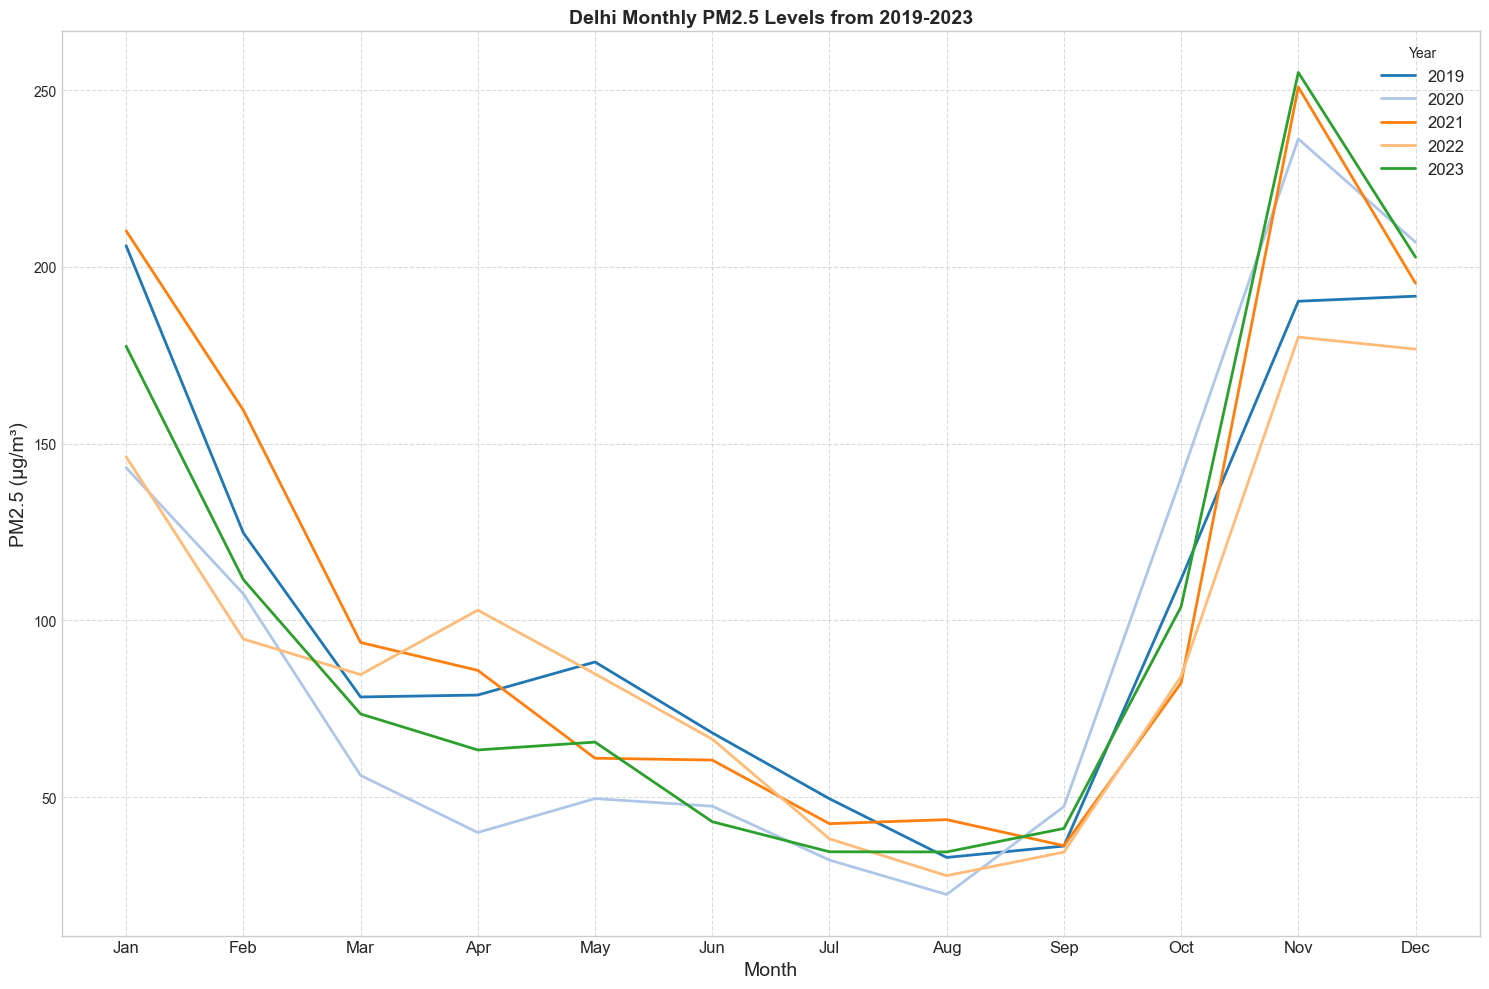

In [148]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month

years = df["Year"].unique()

monthly_avg = df.groupby(["Year", "Month"])[OUTPUT_LABEL].mean().reset_index()
pivot_table = monthly_avg.pivot(index="Month", columns="Year", values=OUTPUT_LABEL)
colors = plt.cm.tab20.colors

plt.figure(figsize=(15, 10))

for i, year in enumerate(pivot_table.columns):
    plt.plot(
        pivot_table.index,
        pivot_table[year],
        label=str(year),
        color=colors[i],
        linewidth=2,
    )

plt.xlabel("Month", fontsize=14)
plt.ylabel(OUTPUT_LABEL, fontsize=14)
plt.title("Delhi Monthly PM2.5 Levels from 2019-2023", fontsize=14, fontweight="bold")
plt.xticks(
    ticks=range(1, 13),
    labels=[
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    ],
    fontsize=12,
)
plt.legend(title="Year", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [24]:
# total percentage of null values across all station files
station_dfs = []
for filename in os.listdir(RAW_DATA_FILES_PATH):
    if re.match(regex.STATION_FILE_PATTERN, filename):
        station_dfs.append(pd.read_csv(os.path.join(RAW_DATA_FILES_PATH, filename)))

In [27]:
station_dataset = pd.concat(station_dfs, ignore_index=True)

In [51]:
df = station_dataset.drop(["Timestamp", "Region"], axis=1)

In [52]:
null_counts = df.isnull().sum()
total_rows = df.shape[0]
null_percentage = (null_counts / total_rows) * 100

In [53]:
import matplotlib.cm as cm

In [66]:
null_percentage = null_percentage.sort_values(ascending=True)

<Axes: >

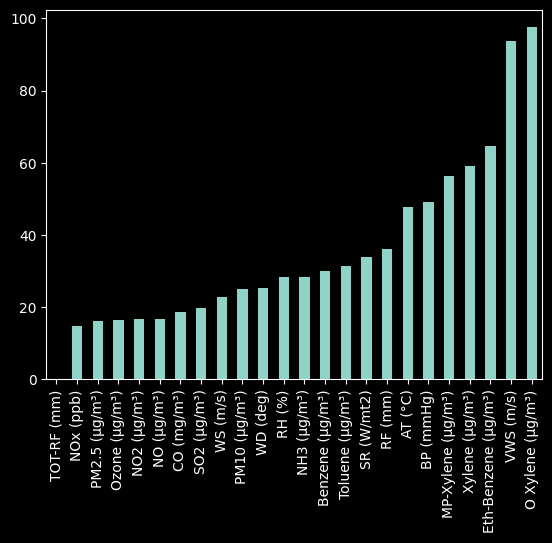

In [67]:
null_percentage.plot(kind="bar")

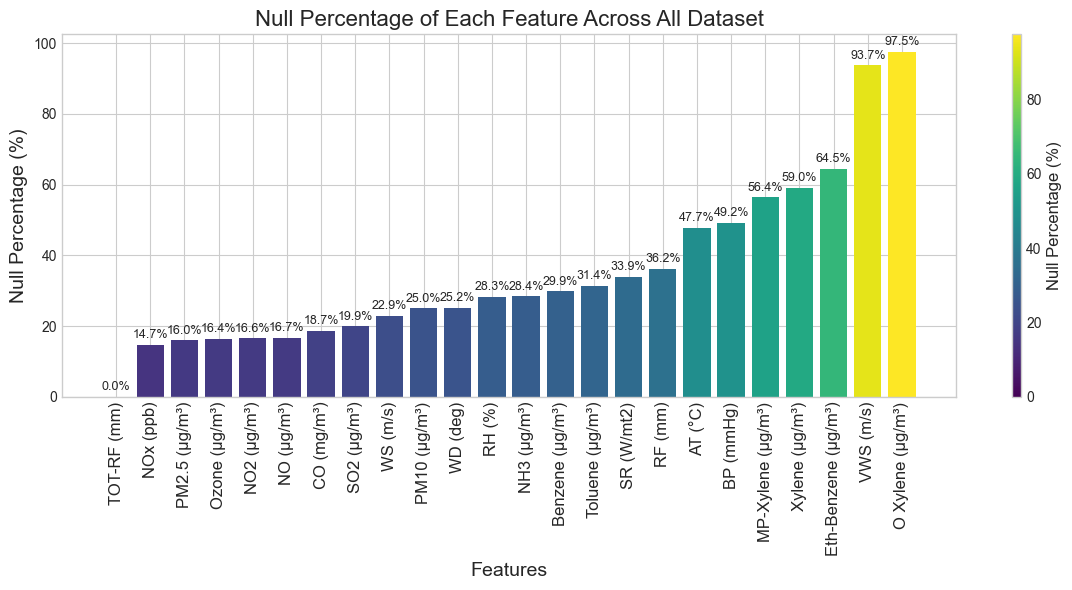

In [152]:
norm = plt.Normalize(null_percentage.min(), null_percentage.max())
colors = cm.viridis(norm(null_percentage.values))

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(null_percentage.index, null_percentage.values, color=colors)

ax.set_xlabel("Features", fontsize=14)
ax.set_ylabel("Null Percentage (%)", fontsize=14)
ax.set_title("Null Percentage of Each Feature Across All Dataset", fontsize=16)

# Adding percentage labels above bars
for bar, percentage in zip(bars, null_percentage):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        f"{percentage:.1f}%",
        ha="center",
        va="bottom",
        fontsize=9,
        # fontweight="bold",
    )

# Adding colors to bar
sm = cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, aspect=40)
cbar.set_label("Null Percentage (%)", fontsize=12)

ax.set_xticks(range(len(null_percentage)))
ax.set_xticklabels(null_percentage.index, rotation=90, fontsize=12)
plt.tight_layout()
plt.show()

In [69]:
# concentration of PM2.5 feature across different regions
dataset = pd.read_csv(os.path.join(RAW_DATA_FILES_PATH, "2019_all_regions.csv"))

In [89]:
df = dataset[dataset["Region"] != "Faridabad"]

In [90]:
df_log = df.copy()
df_log.loc[:, OUTPUT_LABEL] = np.log1p(df_log[OUTPUT_LABEL])

In [92]:
(df_log[OUTPUT_LABEL].isnull().sum()/df_log.shape[0])*100

np.float64(13.607305936073057)

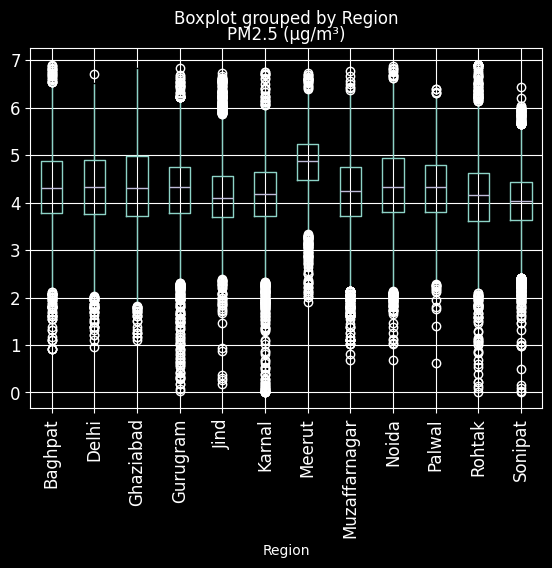

In [93]:
plt.Figure(figsize=(12, 6))
df_log.boxplot(column="PM2.5 (µg/m³)", by="Region", rot=90, fontsize=12)
plt.show()

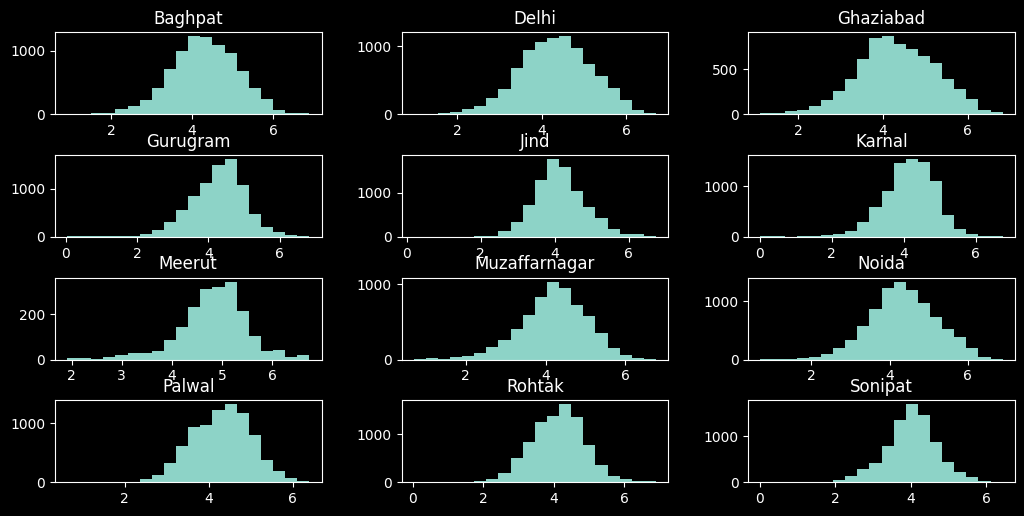

In [94]:
plt.Figure(figsize=(12, 6))
df_log.hist(column="PM2.5 (µg/m³)", by="Region", bins=20, figsize=(12, 6),rot=0)
plt.show()

In [98]:
Q1 = df_log[OUTPUT_LABEL].quantile(0.25)
Q3 = df_log[OUTPUT_LABEL].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_log[(df_log[OUTPUT_LABEL] < lower_bound) | (df_log[OUTPUT_LABEL] > upper_bound)]

In [99]:
outlier_percentage = len(outliers) / df_log.shape[0] * 100
print(f"Percentage of outliers: {outlier_percentage}%")

Percentage of outliers: 1.0359589041095891%


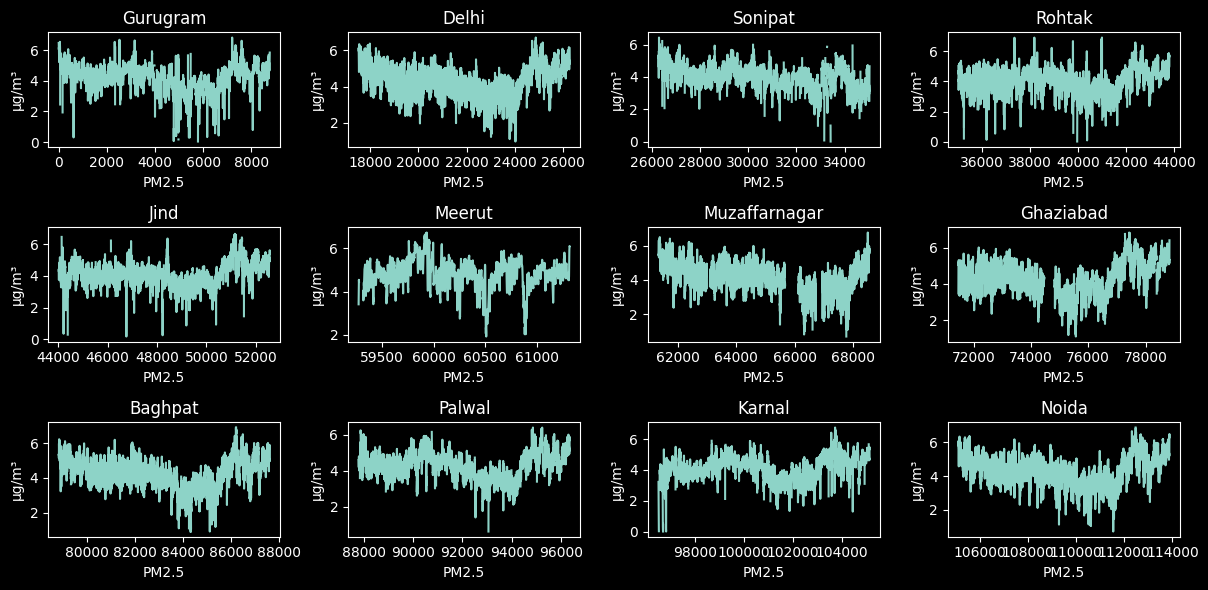

In [102]:
col = 4
row = (n_regions + col - 1) // col

fig, axes = plt.subplots(row, col, figsize=(12, 6))
axes = axes.flatten()

for i, region in enumerate(regions):
    df_log[df_log["Region"] == region][OUTPUT_LABEL].plot(ax=axes[i])
    axes[i].set_title(region)
    axes[i].set_xlabel("PM2.5")
    axes[i].set_ylabel("µg/m³")
# df_log.groupby("Region")[OUTPUT_LABEL].plot()
plt.tight_layout()
plt.show()

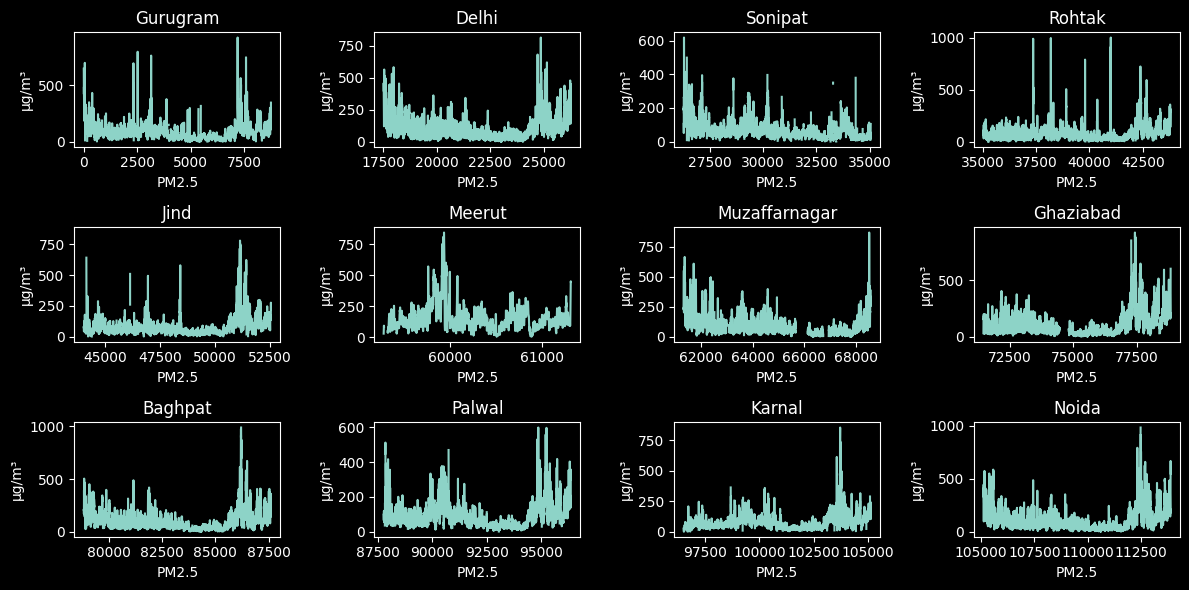

In [103]:
col = 4
row = (n_regions + col - 1) // col

fig, axes = plt.subplots(row, col, figsize=(12, 6))
axes = axes.flatten()

for i, region in enumerate(regions):
    df[df["Region"] == region][OUTPUT_LABEL].plot(ax=axes[i])
    axes[i].set_title(region)
    axes[i].set_xlabel("PM2.5")
    axes[i].set_ylabel("µg/m³")

plt.tight_layout()
plt.show()

In [95]:
df_sq = df.copy()
df_sq.loc[:, OUTPUT_LABEL] = np.sqrt(df_sq[OUTPUT_LABEL])

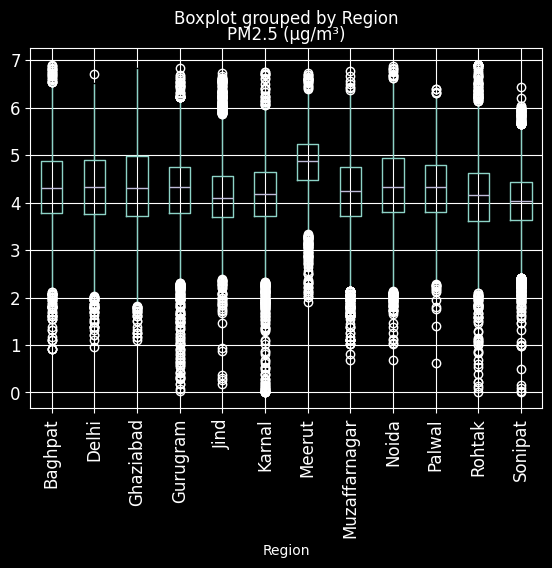

In [96]:
plt.Figure(figsize=(12, 6))
df_log.boxplot(column="PM2.5 (µg/m³)", by="Region", rot=90, fontsize=12)
plt.show()

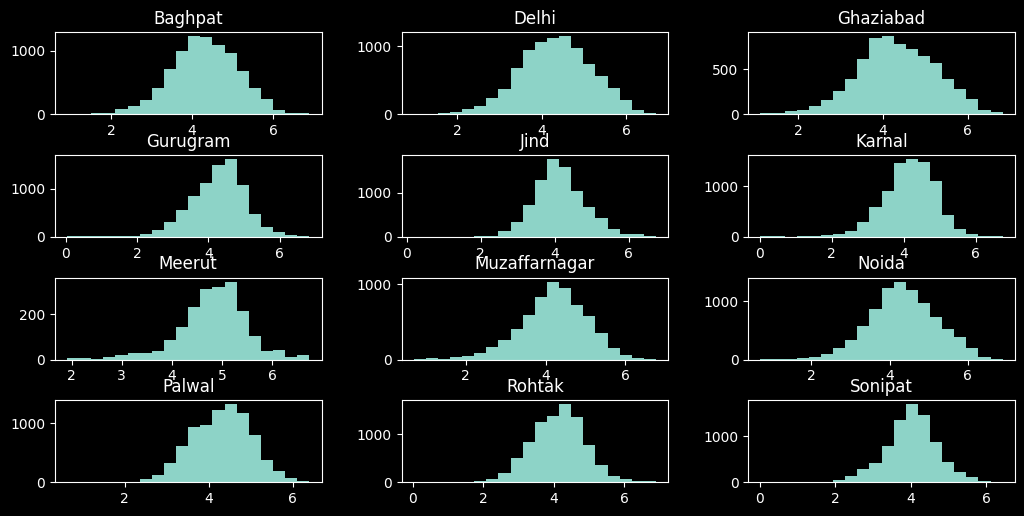

In [97]:
plt.Figure(figsize=(12, 6))
df_log.hist(column="PM2.5 (µg/m³)", by="Region", bins=20, figsize=(12, 6),rot=0)
plt.show()

In [104]:
# box plot of PM2.5 for each region without outliers
no_outliers = df_log[(df_log[OUTPUT_LABEL] > lower_bound) & (df_log[OUTPUT_LABEL] < upper_bound)]

<Figure size 2000x1500 with 0 Axes>

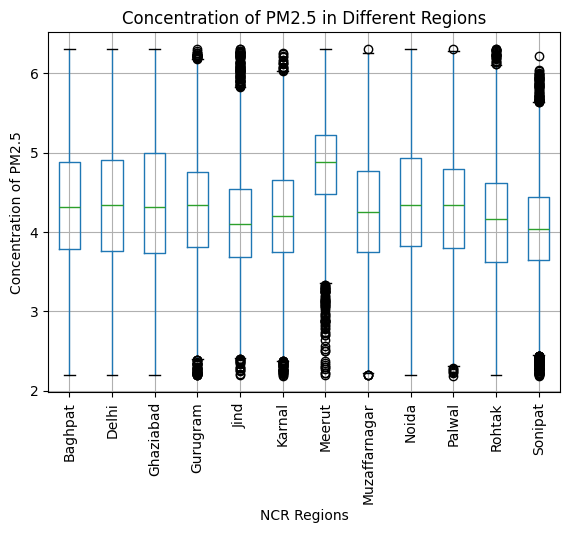

In [161]:
plt.style.use("default")
plt.figure(figsize=(20, 15))
no_outliers.boxplot(column="PM2.5 (µg/m³)", by="Region", rot=90, fontsize=10)
plt.xlabel("NCR Regions")
plt.ylabel("Concentration of PM2.5")
plt.suptitle('')
plt.title("Concentration of PM2.5 in Different Regions")
plt.show()

In [158]:
# Heatmap of only lower triangle values
dataset = pd.read_csv(os.path.join(RAW_DATA_FILES_PATH, "2019.csv"))
df = dataset.drop(
    [
        "Timestamp",
        "VWS (m/s)",
        "O Xylene (µg/m³)",
        "Eth-Benzene (µg/m³)",
        "MP-Xylene (µg/m³)",
        "Xylene (µg/m³)",
    ],
    axis=1,
)

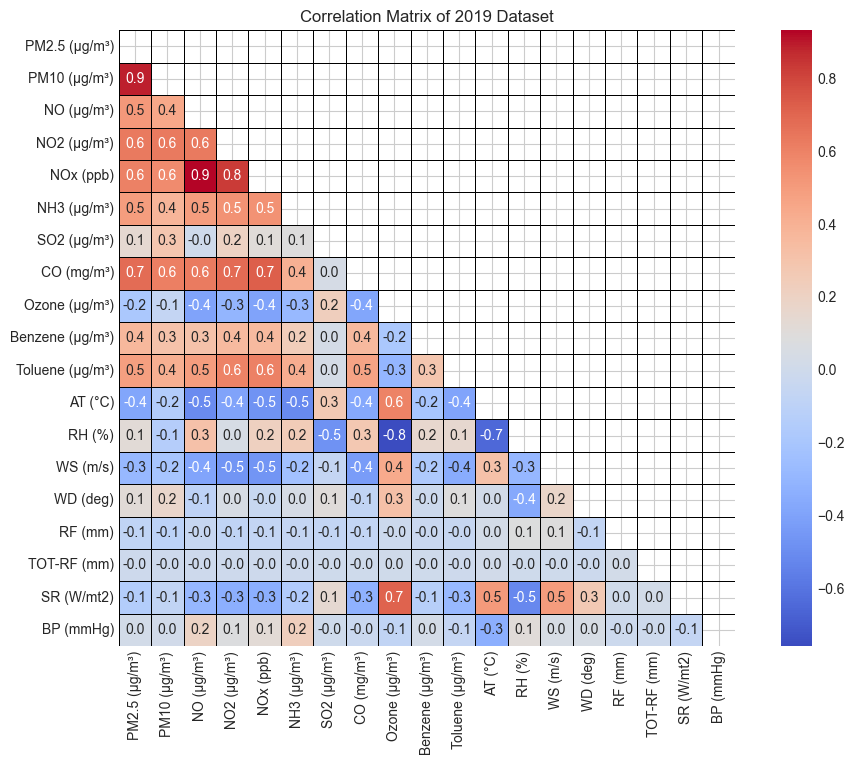

In [159]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(
    df.corr(),
    annot=True,
    mask=mask,
    cmap="coolwarm",
    cbar=True,
    fmt=".1f",
    square=True,
    linewidths=0.5,
    linecolor='black'
)
plt.title("Correlation Matrix of 2019 Dataset")
plt.show()

In [126]:
df.columns

Index(['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)',
       'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)',
       'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'],
      dtype='object')